In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset =  pd.read_csv('df_train.csv') 

In [3]:
dataset.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Columns: 110 entries, Unnamed: 0 to target
dtypes: float64(60), int64(50)
memory usage: 113.7 MB


In [4]:
dataset = dataset.drop(['Unnamed: 0'], axis = 1)

In [5]:
dataset.iloc[:,0:5].isnull()

,disrict,client_catg,region,region_group,coop_time
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
135488,False,False,False,False,False
135489,False,False,False,False,False
135490,False,False,False,False,False
135491,False,False,False,False,False


In [6]:
dataset = dataset.drop(['counter_statue_max_mean','consommation_level_2_max_mean','consommation_level_3_max_mean','consommation_level_4_max_mean'], axis = 1)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Columns: 105 entries, disrict to target
dtypes: float64(56), int64(49)
memory usage: 108.5 MB


In [8]:
dataset = dataset.dropna()

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123643 entries, 0 to 135492
Columns: 105 entries, disrict to target
dtypes: float64(56), int64(49)
memory usage: 100.0 MB


<AxesSubplot:>

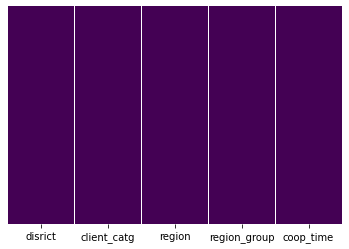

In [10]:
sns.heatmap(dataset.iloc[:,0:5].isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
dataset.head()

,disrict,client_catg,region,region_group,coop_time,is_weekday_mean,transactions_count,tarif_type_mean,tarif_type_std,tarif_type_min,...,months_number_max_mean,counter_type_range,counter_type_max_mean,invoice_month_range,invoice_month_max_mean,invoice_year_range,invoice_year_max_mean,delta_index_range,delta_index_max_mean,target
0,60,11,101,200,288,0.028571,35,11.0,0.0,11,...,2.592593,0,1.0,11,1.794872,14,1.003907,1348,3.818482,0
1,69,11,107,200,199,0.054054,37,11.0,0.0,11,...,1.850000,0,1.0,9,1.947368,14,1.003560,1017,2.164865,0
2,62,11,301,300,393,0.055556,18,11.0,0.0,11,...,1.862069,0,1.0,9,1.663866,14,1.004006,2894,3.684399,0
3,69,11,105,200,265,0.050000,20,11.0,0.0,11,...,1.428571,0,1.0,9,1.801802,7,1.001693,15,12.500000,0
4,62,11,303,300,50,0.285714,14,11.0,0.0,11,...,1.076923,0,1.0,10,1.584906,4,1.001062,2258,2.581714,0


In [12]:
dataset = dataset.replace([np.inf,-np.inf], np.nan)

In [13]:
dataset = dataset.dropna()

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123557 entries, 0 to 135492
Columns: 105 entries, disrict to target
dtypes: float64(56), int64(49)
memory usage: 99.9 MB


In [15]:
features = dataset.drop(['target'], axis = 1)
target = dataset['target']

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(features)
scaled_features = scaler.transform(features)

In [17]:
df_scaled_features = pd.DataFrame(scaled_features, columns = features.columns)
df_scaled_features

,disrict,client_catg,region,region_group,coop_time,is_weekday_mean,transactions_count,tarif_type_mean,tarif_type_std,tarif_type_min,...,months_number_range,months_number_max_mean,counter_type_range,counter_type_max_mean,invoice_month_range,invoice_month_max_mean,invoice_year_range,invoice_year_max_mean,delta_index_range,delta_index_max_mean
0,0.000000,0.0,0.000000,0.0,0.582524,0.028571,0.073394,0.040251,0.000000,0.142857,...,0.000027,0.017515,0.0,0.000000,1.000000,0.227106,1.000000,0.721412,0.001192,0.788090
1,1.000000,0.0,0.020134,0.0,0.409709,0.054054,0.077982,0.040251,0.000000,0.142857,...,0.000016,0.009348,0.0,0.000000,0.818182,0.270677,1.000000,0.657374,0.000899,0.788028
2,0.222222,0.0,0.671141,1.0,0.786408,0.055556,0.034404,0.040251,0.000000,0.142857,...,0.000022,0.009481,0.0,0.000000,0.818182,0.189676,1.000000,0.739702,0.002560,0.788085
3,1.000000,0.0,0.013423,0.0,0.537864,0.050000,0.038991,0.040251,0.000000,0.142857,...,0.000005,0.004713,0.0,0.000000,0.818182,0.229086,0.500000,0.312570,0.000012,0.788415
4,0.222222,0.0,0.677852,1.0,0.120388,0.285714,0.025229,0.040251,0.000000,0.142857,...,0.000005,0.000846,0.0,0.000000,0.909091,0.167116,0.285714,0.196191,0.001997,0.788043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123552,0.000000,0.0,0.000000,0.0,0.304854,0.200000,0.073394,0.289597,0.700486,0.095238,...,0.000016,0.010998,1.0,0.026667,1.000000,0.291209,0.642857,0.354148,0.001358,0.788062
123553,0.000000,0.0,0.000000,0.0,0.955340,0.000000,0.002294,0.007318,0.000000,0.095238,...,0.000011,0.003666,0.0,0.000000,0.727273,0.204082,0.142857,0.092051,0.000026,0.788044
123554,0.333333,0.0,0.704698,1.0,0.166990,0.000000,0.087156,0.529420,0.747623,0.142857,...,0.000005,0.000275,1.0,0.070000,0.727273,0.186636,0.428571,0.290447,0.000735,0.788113
123555,0.333333,0.0,0.704698,1.0,0.188350,0.194444,0.075688,0.411657,0.730415,0.142857,...,0.000011,0.010403,1.0,0.042424,0.909091,0.211982,0.500000,0.394622,0.000921,0.788094


In [18]:
new_dataset = pd.concat([df_scaled_features,target], axis = 1)

In [19]:
new_dataset

,disrict,client_catg,region,region_group,coop_time,is_weekday_mean,transactions_count,tarif_type_mean,tarif_type_std,tarif_type_min,...,months_number_max_mean,counter_type_range,counter_type_max_mean,invoice_month_range,invoice_month_max_mean,invoice_year_range,invoice_year_max_mean,delta_index_range,delta_index_max_mean,target
0,0.000000,0.0,0.000000,0.0,0.582524,0.028571,0.073394,0.040251,0.0,0.142857,...,0.017515,0.0,0.0,1.000000,0.227106,1.000000,0.721412,0.001192,0.788090,0.0
1,1.000000,0.0,0.020134,0.0,0.409709,0.054054,0.077982,0.040251,0.0,0.142857,...,0.009348,0.0,0.0,0.818182,0.270677,1.000000,0.657374,0.000899,0.788028,0.0
2,0.222222,0.0,0.671141,1.0,0.786408,0.055556,0.034404,0.040251,0.0,0.142857,...,0.009481,0.0,0.0,0.818182,0.189676,1.000000,0.739702,0.002560,0.788085,0.0
3,1.000000,0.0,0.013423,0.0,0.537864,0.050000,0.038991,0.040251,0.0,0.142857,...,0.004713,0.0,0.0,0.818182,0.229086,0.500000,0.312570,0.000012,0.788415,0.0
4,0.222222,0.0,0.677852,1.0,0.120388,0.285714,0.025229,0.040251,0.0,0.142857,...,0.000846,0.0,0.0,0.909091,0.167116,0.285714,0.196191,0.001997,0.788043,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
135487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
135489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
135490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(df_scaled_features, target);
# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':df_scaled_features.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();